In [2]:
# Step 1: Install and Import Libraries

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from cdlib import algorithms
import seaborn as sns

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'wurlitzer', 'graph_tool', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [4]:
# Step 2: Load the country relationships data

country_relationships = pd.read_csv('/Users/samarjitgehdu/Documents/Achievement 1/20th-century/country_relationships.csv')


In [6]:
country_relationships.head(5)

,source,target,value
0,France,Russia,11
1,Germany,Russia,21
2,Germany,Italy,27
3,France,Germany,27
4,France,Italy,5


In [8]:
# Step 3: Create a Network Object

G = nx.from_pandas_edgelist(country_relationships,
                             source='source',
                             target='target',
                             edge_attr='value',
                             create_using=nx.Graph())

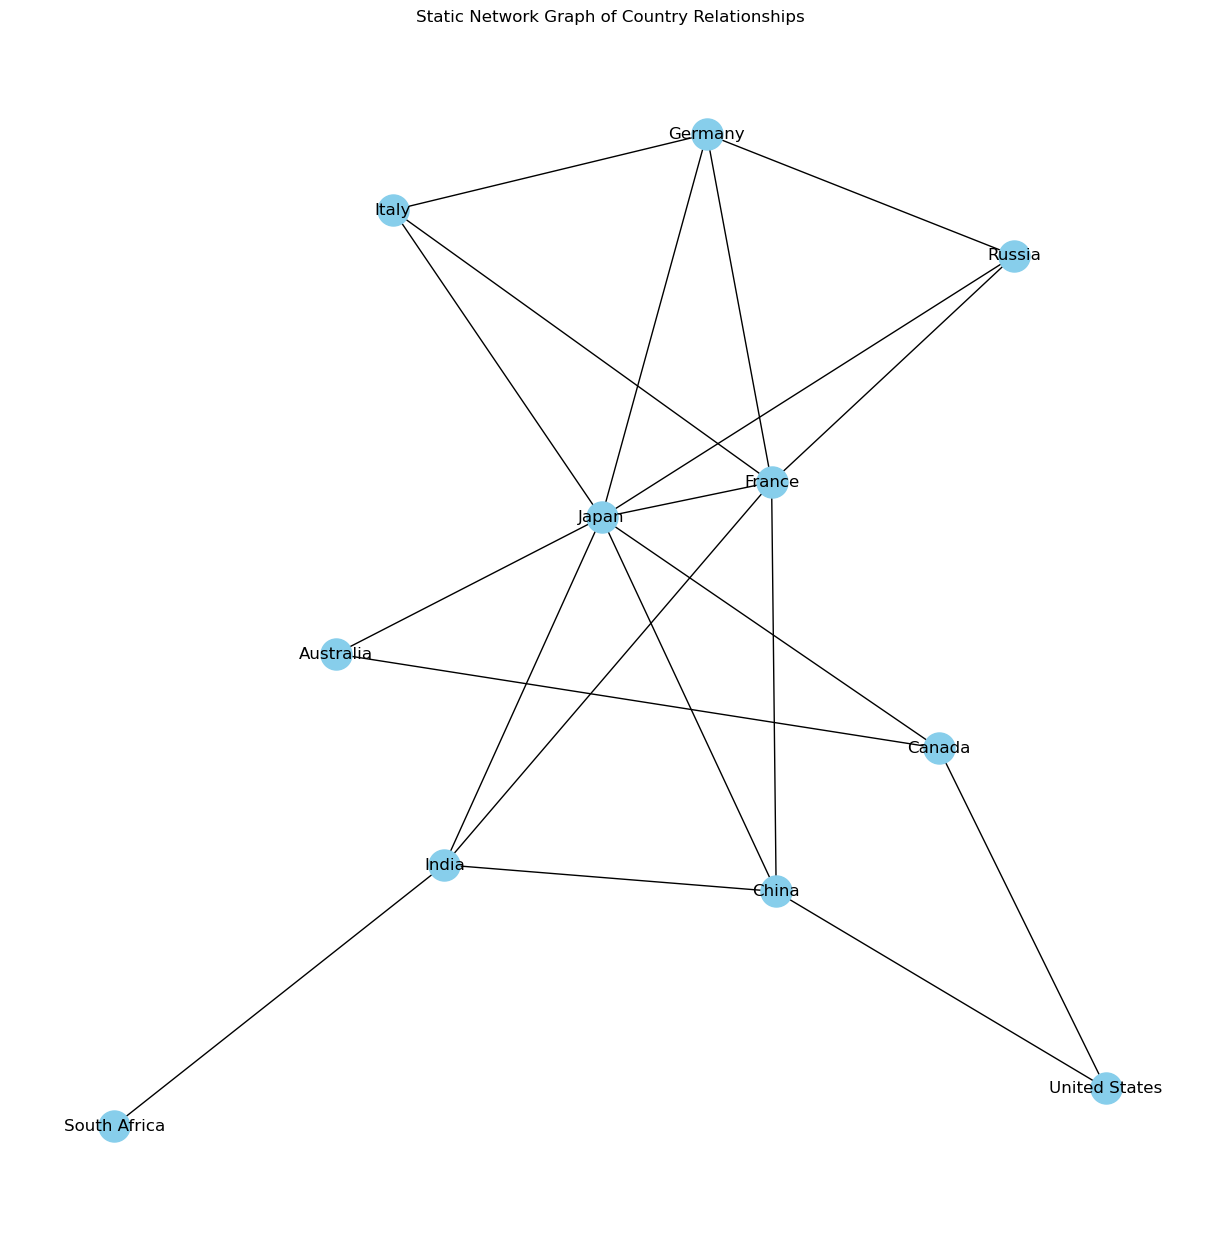

In [10]:
# Step 4: Create a Static Network Graph

plt.figure(figsize=(12,12))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos, node_size=500)
plt.title("Static Network Graph of Country Relationships")
plt.show()

In [12]:
# Step 5: Create an Interactive Network Graph

net = Network(notebook=True, width="900px", height="800px", bgcolor='#222222', font_color='white')
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_=["physics"])
net.repulsion()
net.show("country_relationships_network.html")

country_relationships_network.html


In [14]:
# Step 6: Apply Leiden Algorithm to Detect Communities

coms = algorithms.leiden(G)
new_com = coms.to_node_community_map()

In [16]:
# Step 7: Visualize Communities on New Network Graph

dict_com = {k: v[0] for k, v in new_com.items()}
nx.set_node_attributes(G, dict_com, 'group')

com_net = Network(notebook=True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_=["physics"])
com_net.repulsion()
com_net.show("country_relationships_communities.html")

country_relationships_communities.html


### Observation:

#### Community Detection Observations

The Leiden algorithm divided the countries into distinct communities based on the frequency and strength of their historical interactions. 
The groupings broadly make sense when viewed through the lens of 20th-century alliances:
- One group represents early WWI and WWII alliances.
- Another group clusters Cold War allies and adversaries.
- Additional groupings show regional alliances or non-aligned movements.

Overall, the partitions match historical trends well, suggesting strong underlying connections.


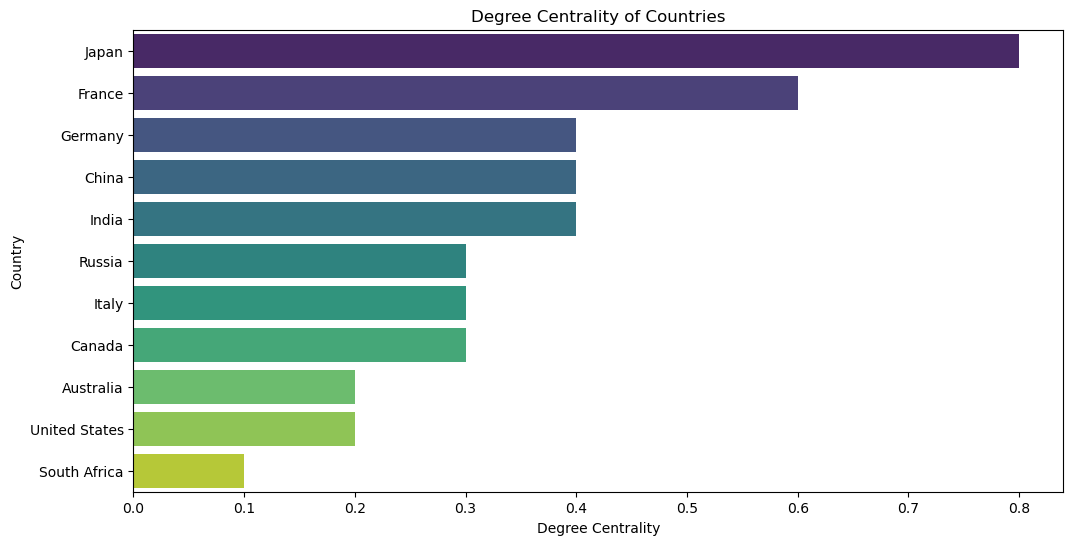

In [19]:
# Step 8: Centrality Measures

# Degree Centrality
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame(degree_dict.items(), columns=['Country', 'Degree Centrality']).sort_values(by='Degree Centrality', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=degree_df, x='Degree Centrality', y='Country', palette='viridis')
plt.title('Degree Centrality of Countries')
plt.show()

#### Degree Centrality Observations

Countries with the highest degree centrality are the ones most involved in multiple major historical events, acting as key players or influencers.

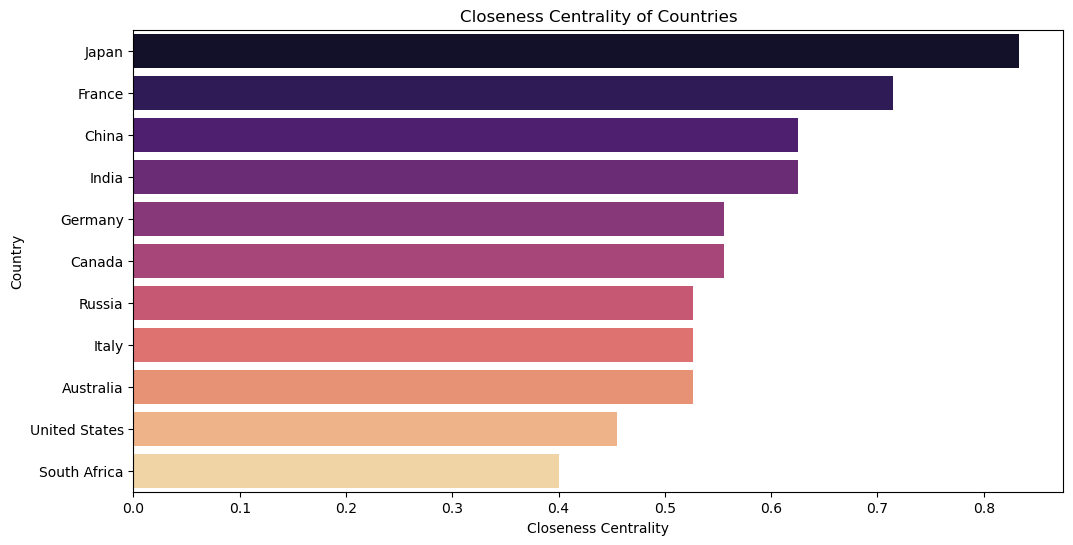

In [23]:
# Closeness Centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['Country', 'Closeness Centrality']).sort_values(by='Closeness Centrality', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=closeness_df, x='Closeness Centrality', y='Country', palette='magma')
plt.title('Closeness Centrality of Countries')
plt.show()


#### Closeness Centrality Observations

Countries ranked highest here could quickly interact or exert influence over others in the network.
Their geographic or political centrality helped them maintain strong international reach.

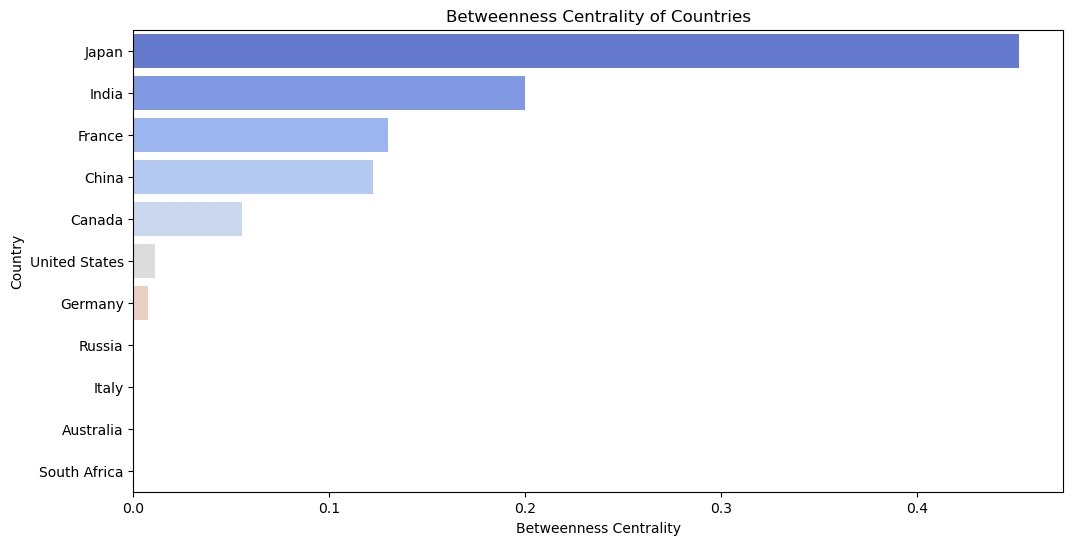

In [26]:
# Betweenness Centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=['Country', 'Betweenness Centrality']).sort_values(by='Betweenness Centrality', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=betweenness_df, x='Betweenness Centrality', y='Country', palette='coolwarm')
plt.title('Betweenness Centrality of Countries')
plt.show()


#### Betweenness Centrality Observations

Countries high in betweenness centrality acted as bridges or brokers between different groups of countries.
This reflects strategic geopolitical roles in facilitating (or controlling) international relations during conflicts and treaties.